# Prophet

- https://facebook.github.io/prophet/
- https://ai.facebook.com/blog/neuralprophet-the-neural-evolution-of-facebooks-prophet/

For predictions, consider AR-Net (ARIMA), GARCH, LSTM and Neural-Prophet
- https://github.com/thuynh323/Time-series-forecasting/blob/main/Organic%20Avocado%20Sales%20-%20Forecasting.ipynb
- https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
- https://medium.com/analytics-vidhya/arima-garch-forecasting-with-python-7a3f797de3ff
- https://lavinei.github.io/pybats/

In [ ]:
%pip install --upgrade numpy
%pip install --upgrade pandas
%pip install --upgrade yfinance
%pip install --upgrade prophet
%pip install --upgrade neuralprophet

In [2]:
import pandas as df
import yfinance as yf
from prophet import Prophet
from neuralprophet import NeuralProphet

## Loading data

In [5]:
aapl = yf.Ticker("AAPL")
df = aapl.history(period='3y')[['Open']].reset_index()
df['Date'] = df['Date'].dt.tz_localize(None)
#df['Date'] = df['Date'].dt.tz_convert(None)
df.columns = ['ds','y']
df

,ds,y
0,2020-03-18,58.773954
1,2020-03-19,60.641821
2,2020-03-20,60.590340
3,2020-03-23,55.908429
4,2020-03-24,57.938069
...,...,...
751,2023-03-13,147.809998
752,2023-03-14,151.279999
753,2023-03-15,151.190002
754,2023-03-16,152.160004


## Prophet

In [37]:
train_size = 252*3 # use 3 year of data as trainig
val_size = 252 # use 1 year of data as validation
train_val_size = train_size + val_size # Size od train  + validarion set
i = train_val_size # Day to forecast
H = 21

# Copy data frame
df1 = df.copy()

# Fit prophet model
m1 = Prophet()
m1.fit(df1[i-train_val_size:i])

# Create dataframe with the dates we want to predict
future1 = m1.make_future_dataframe(periods=2*H)

# Eliminate weekend from future dataframe
future1['day'] = future1['ds'].dt.weekday
future1 = future1[future1['day']<=4]

# Predict
forecast1 = m1.predict(future1)

17:22:44 - cmdstanpy - INFO - Chain [1] start processing
17:22:44 - cmdstanpy - INFO - Chain [1] done processing


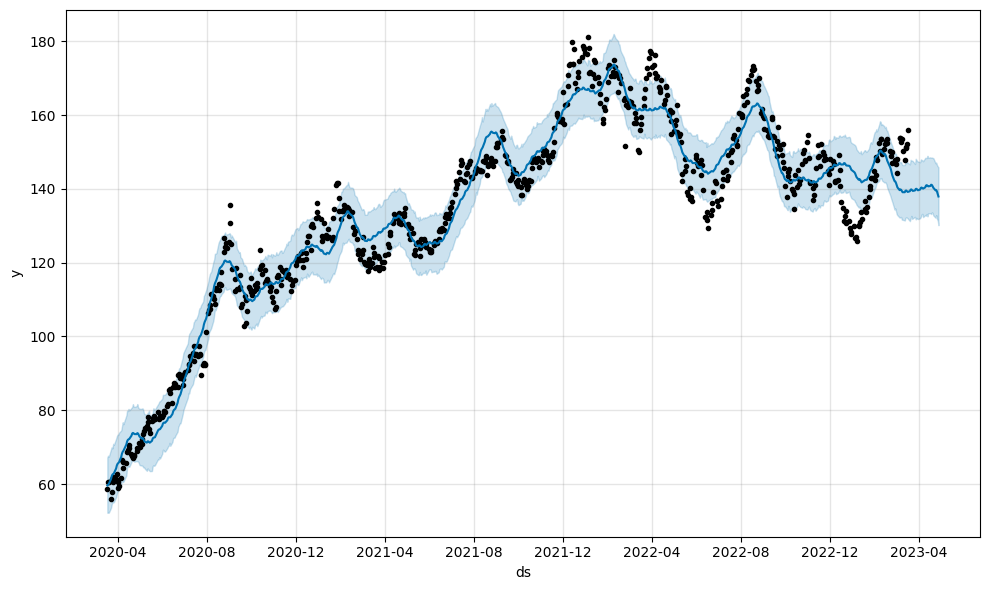

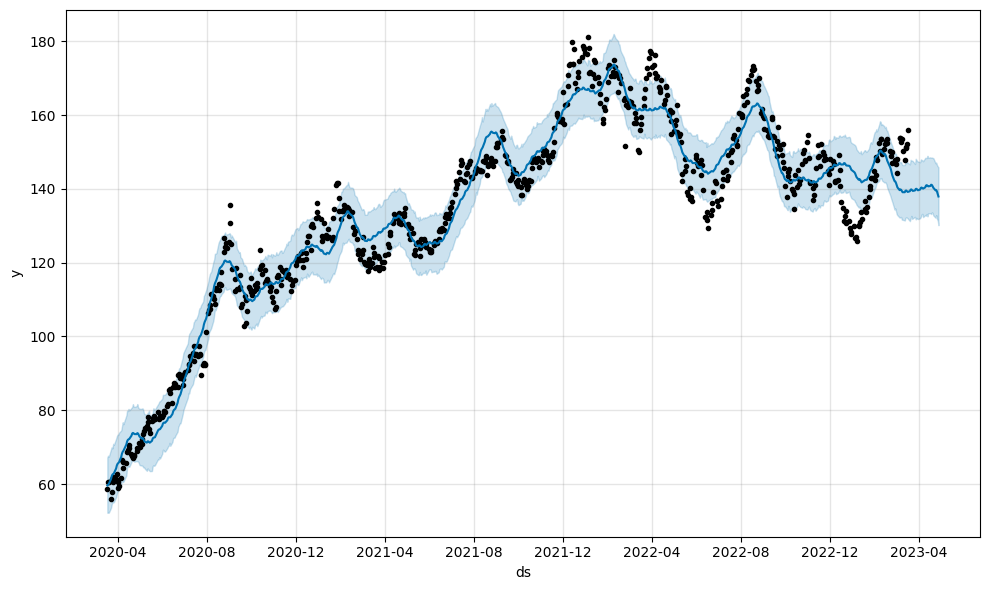

In [38]:
#Plotting the data
m1.plot(forecast1)

## Neural Prophet

In [10]:
df2 = df.copy()
m2 = NeuralProphet()
m2.fit(df2) #, freq="D")
future2 = m2.make_future_dataframe(df2, periods=30)
forecast2 = m2.predict(future2)
fig_forecast = m2.plot(forecast2)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.296% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 213
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (48) is too small than the required number for the learning rate finder (223). The results might not be optimal.


Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.296% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: 48it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [11]:
m2.plot(forecast2)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '6fbaeb49-55be-48e9-8a1f-fdd644c6133f',
              'x': array([datetime.datetime(2023, 3, 20, 0, 0),
                          datetime.datetime(2023, 3, 21, 0, 0),
                          datetime.datetime(2023, 3, 22, 0, 0),
                          datetime.datetime(2023, 3, 23, 0, 0),
                          datetime.datetime(2023, 3, 24, 0, 0),
                          datetime.datetime(2023, 3, 27, 0, 0),
                          datetime.datetime(2023, 3, 28, 0, 0),
                          datetime.datetime(2023, 3, 29, 0, 0),
                          datetime.datetime(2023, 3, 30, 0, 0),
                          datetime.datetime(2023, 3, 31, 0, 0),
                          datetime.datetime(2023, 4, 3, 0, 0),
               